In [79]:
import pandas as pd

df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
# to get a brief overview of the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [82]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [83]:
# to check if the data set has any null or nan or na values or not
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [84]:
# some refining of the species column
df['species'] = df['species'].str.replace('Iris-', '')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


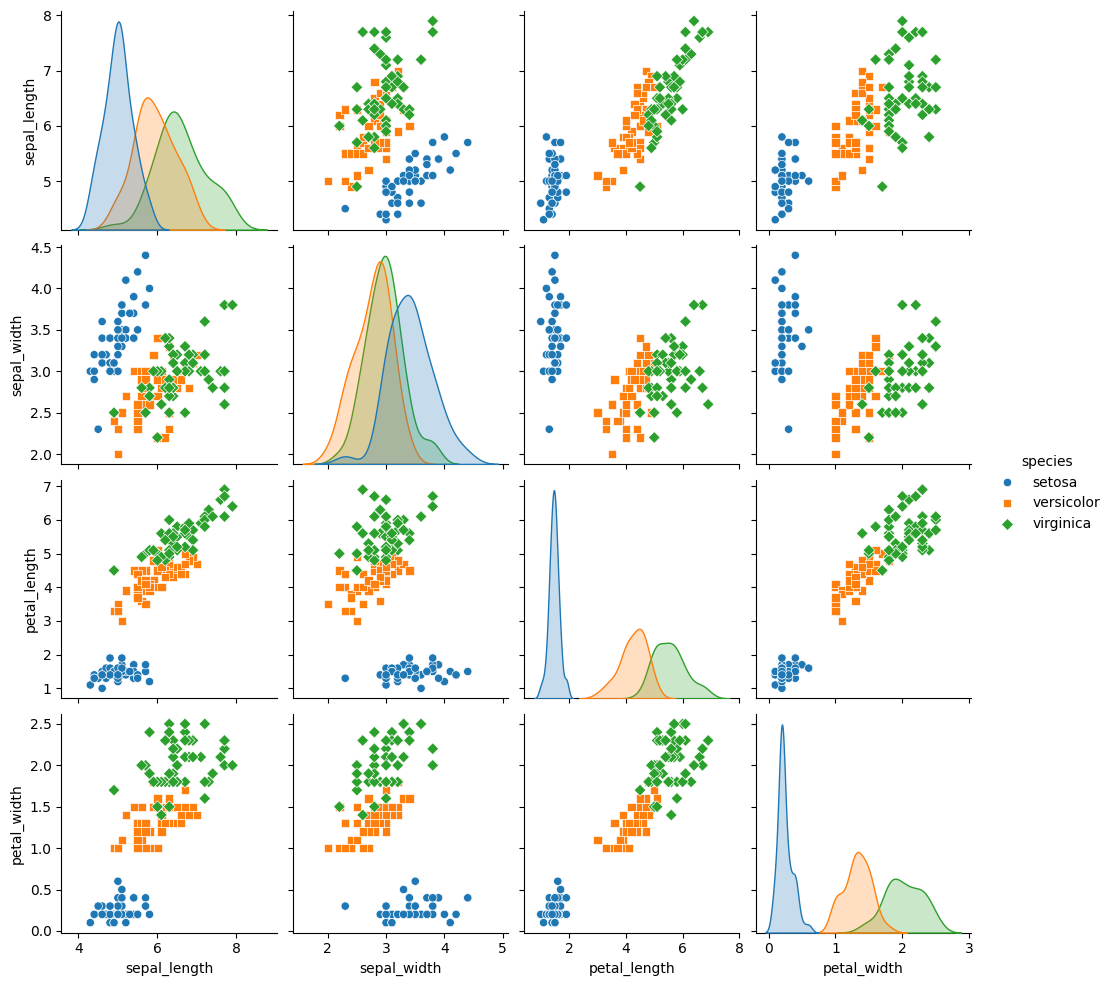

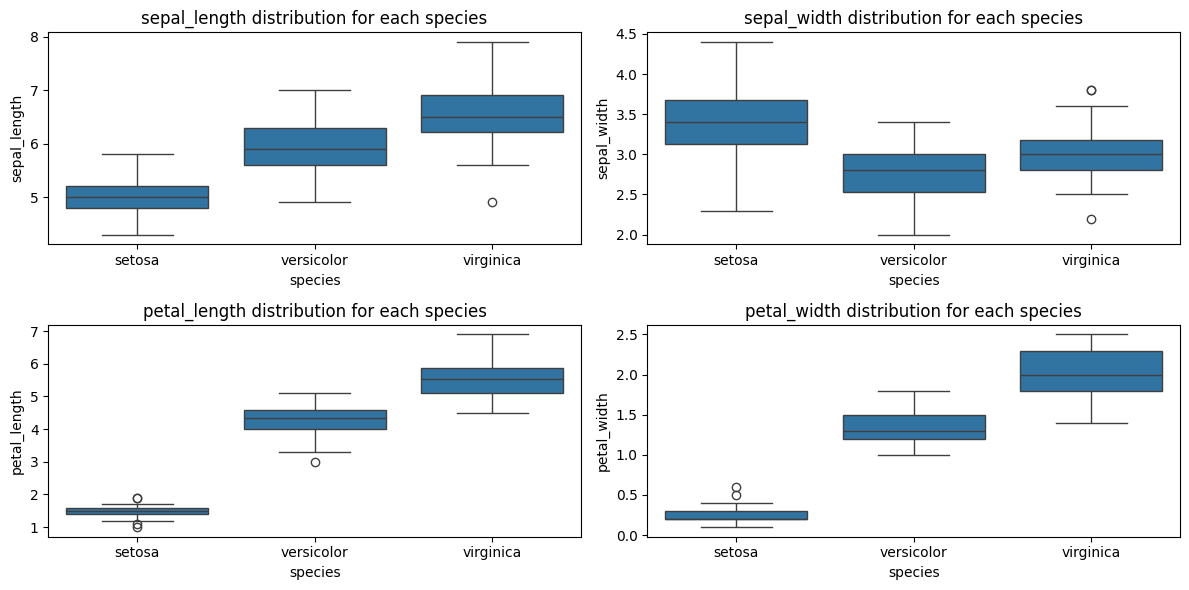

'\nTo explain the second of the two huge set of figures...\nin the boxplot for sepal length for example, the three boxes (one for each species),\nand the height of each box represents the interquartile range (IQR) of the sepal length for that species,\nthe line inside each box is the median sepal length for that species,\nwhiskers extend from the box indicate the range of the data, and individual points beyond the whiskers are potential outliers.\n'

In [85]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features and species
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.show()

# Boxplot to visualize the distribution of each feature for each species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} distribution for each species')
plt.tight_layout()
plt.show()

'''
To explain the second of the two huge set of figures...
in the boxplot for sepal length for example, the three boxes (one for each species),
and the height of each box represents the interquartile range (IQR) of the sepal length for that species,
the line inside each box is the median sepal length for that species,
whiskers extend from the box indicate the range of the data, and individual points beyond the whiskers are potential outliers.
'''



In [86]:
# encoding categorical variables
'''
the 'species' column contains categorical data,
ML models typically require numerical input,
so we need to encode these categories into numerical values
one common encoding method is one-hot encoding.
'''

data_encoded = pd.get_dummies(df, columns=['species'], drop_first=True)
data_encoded.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [87]:
# trying different algorithms to choose the best one based on its evaluated accuracy
# Separate features (X) and target variable (y) from the updated dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_encoded = data_encoded.drop('species_virginica', axis=1)
y_encoded = data_encoded['species_virginica'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (optional but often beneficial for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# from sklearn.model_selection import cross_val_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_cv_scores = cross_val_score(rf_classifier, X_encoded, y_encoded, cv=5, scoring='accuracy')
print("Random Forest Accuracy:", rf_accuracy)
# print("Random Forest Cross-Validation Scores:", rf_cv_scores)
# print("Mean Cross-Validation Accuracy:", rf_cv_scores.mean())


Random Forest Accuracy: 1.0


In [ ]:
'''
As we can see that the accuracy came out to be 100%
This either means that the data was sufficient for the algorithm to classify
or it could mean that there is some overfitting in this case
I check for cross value score, F1 score, and many other to check for issue,
and then I accordingly chose the random forest classifier (RFC), instead of KNN, Gaussian Naive Bayes, or SVC
as all of them resulted in a 100% accuracy which was a little bizarre so based on the various scores, I chose RFC
'''